# About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

# Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
# Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom
import scipy.stats as stats
import math

In [350]:
# downloading and reading the data
df = pd.read_csv('walmart_data.txt')

In [3]:
# Viusualizing the Dataframe
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Basic Observations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

- There are no null values
- Need to convert User_ID, Occupation, marital_status & product_category columns to object or categorical data type.

In [7]:
col = ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category']
df[col] = df[col].astype('object')
df.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [9]:
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


In [285]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

- We have converted the columns data type as required.
- There are more male customers than females.
- Unmarried customers are buyying more than married customers.
- Customers with of age group 26 - 35 made more number of purchases compared to others.
- Out of the 3 city categories, more number of purchases are from City B.
- Customers staying in current city for 1 year make the most purchase.
- There are 5891 unique customers who bought from Walmart.
- There are 20 product categories and 3631 distinct products. Product category 5 is the most purchased in terms of units.
- There is a differene in the Mean & median of purchase indicating presence of outliers

Outlier Detection

<Axes: xlabel='Purchase'>

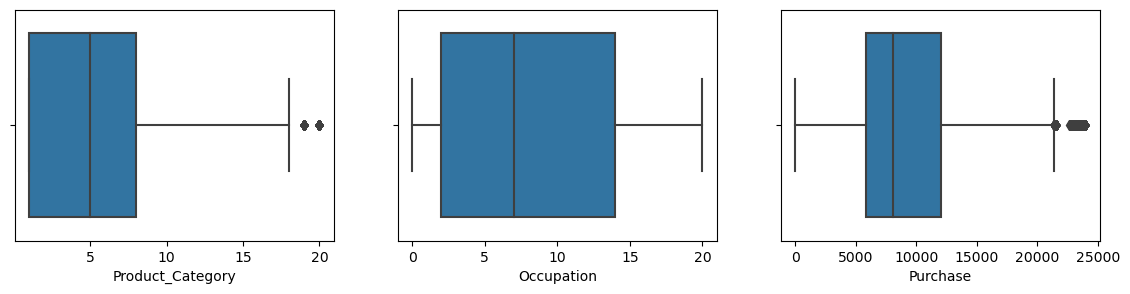

In [346]:
fig, axis = plt.subplots(nrows = 1, ncols=3, figsize = (14,3))
sns.boxplot(x = df.Product_Category, ax = axis[0])
sns.boxplot(x = df.Occupation, ax = axis[1])
sns.boxplot(x = df.Purchase, ax = axis[2])


In [17]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3-Q1
outliers = df["Purchase"][((df["Purchase"]<(Q1-1.5*IQR)) | (df["Purchase"]>(Q3+1.5*IQR)))]
print('Num of outliers = '+str(len(outliers)))
print('Top most outlier = ' + str(outliers.max()))
print('Lowest outlier = ' + str(outliers.min()))

Num of outliers = 2677
Top most outlier = 23961
Lowest outlier = 21401


- We can  confirm that there are outliers in Purchase column based on the above boxplot.
- There are 2677 outliers in Purchase column. Lowest being 21401 and highest outlier is 23961

# Non-Graphical Analysis

In [347]:
# Comparing Male and Female cutomers

print(f'Number of Male & Female customer: \n{df.Gender.value_counts()}')
print('\n')
print(f'Percengtage of Male & Female cutomers:\n{df.Gender.value_counts(normalize = True)}')

Number of Male & Female customer: 
M    414259
F    135809
Name: Gender, dtype: int64


Percengtage of Male & Female cutomers:
M    0.753105
F    0.246895
Name: Gender, dtype: float64


In [221]:
# Comparing cutomers of all the age group

print(f'Number of customers in each age group: \n{df.Age.value_counts()}')
print('\n')
print(f'Percentage of customers of each age group:\n{df.Age.value_counts(normalize = True)}')

Number of customers in each age group: 
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


Percentage of customers of each age group:
26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64


In [220]:
# Comparing cutomers staying in current city for various years

print(f'Number of customers staying in current city based on years: \n{df.Stay_In_Current_City_Years.value_counts()}')
print('\n')
print(f'Percentage of customers staying in current city based on years:\n{df.Stay_In_Current_City_Years.value_counts(normalize = True)}')

Number of customers staying in current city based on years: 
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


Percentage of customers staying in current city based on years:
1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64


In [223]:
# Comparing cutomers in each category of city

print(f'Number of customers in each city catgeory: \n{df.City_Category.value_counts()}')
print('\n')
print(f'Percentage of customers in each city category:\n{df.City_Category.value_counts(normalize = True)}')

Number of customers in each city catgeory: 
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


Percentage of customers in each city category:
B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64


In [349]:
# Comparing married and unmarried customers

print(f'Number of customers based on marital status: \n{df.Marital_Status.value_counts()}')
print('\n')
print(f'Percentage of customers based on marital status:\n{df.Marital_Status.value_counts(normalize = True)}')

Number of customers based on marital status: 
0    324731
1    225337
Name: Marital_Status, dtype: int64


Percentage of customers based on marital status:
0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64


- 75% of customers are male.
- Majority of customers are of age group 26 - 35.
- 59% customers are unmarried while 41% are married.
- Majority of customers (42%) are from City B category.
- Most customers are staying in the current city for 1 year. 86.5% of customers are staying in the current city for atleast 1 year

# Visual Analysis

<Axes: xlabel='Purchase', ylabel='Count'>

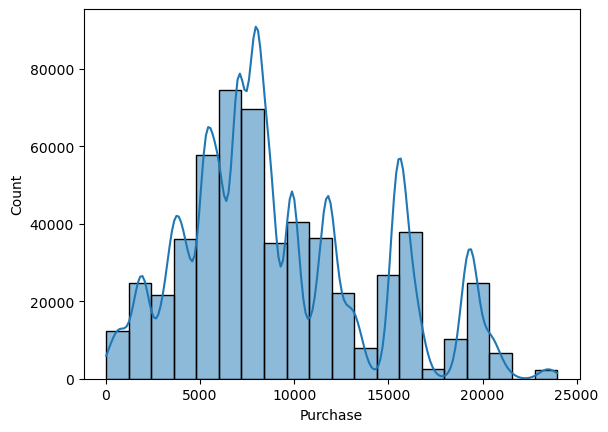

In [348]:
sns.histplot(df.Purchase, bins = 20, kde = True)

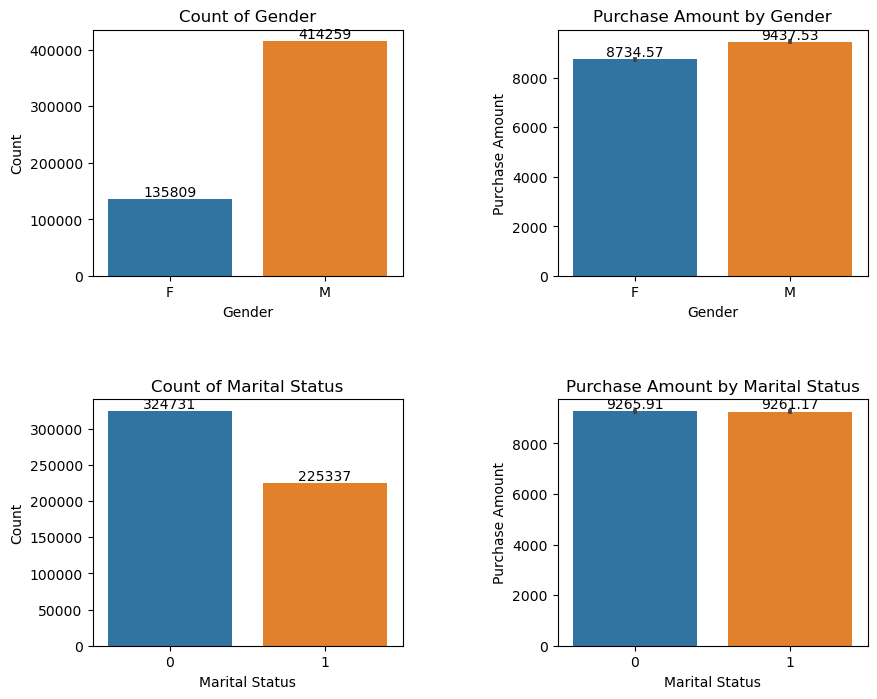

In [362]:
# Count of orders placed by customers based on various categories
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Countplot for Gender
sns.countplot(x=df['Gender'], ax=axis[0, 0])
axis[0, 0].set_title('Count of Gender')
axis[0, 0].set_xlabel('Gender')
axis[0, 0].set_ylabel('Count')
# Add count on top of each bar for Gender
for p in axis[0, 0].patches:
    axis[0, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Countplot for Marital Status
sns.countplot(x=df['Marital_Status'], ax=axis[1, 0])
axis[1, 0].set_title('Count of Marital Status')
axis[1, 0].set_xlabel('Marital Status')
axis[1, 0].set_ylabel('Count')
# Add count on top of each bar for Marital Status
for p in axis[1, 0].patches:
    axis[1, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


# Barplot for Gender
sns.barplot(x=df['Gender'], y=df['Purchase'], ax=axis[0, 1])
axis[0, 1].set_title('Purchase Amount by Gender')
axis[0, 1].set_xlabel('Gender')
axis[0, 1].set_ylabel('Purchase Amount')
# Adding values on top of bars for Gender
for p in axis[0, 1].patches:
    axis[0, 1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

# Barplot for Marital Status
sns.barplot(x=df['Marital_Status'], y=df['Purchase'], ax=axis[1, 1])
axis[1, 1].set_title('Purchase Amount by Marital Status')
axis[1, 1].set_xlabel('Marital Status')
axis[1, 1].set_ylabel('Purchase Amount')
# Adding values on top of bars for Marital Status
for p in axis[1, 1].patches:
    axis[1, 1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust space between subplots

plt.show()


* Gender comparison:

- We can cnotice that there is a huge difference in number of orders by male customers and female customers.
- However, the difference in the purchase value is showing very less difference.
- This indicates that the purchase value per order is higher for fermale customers compared to male customers.

* Marital Status:

- More number of orders or purchase is made by unmarried customers.
- Both married and unmarried customers have almost the same purchase value.
- Married customers have high purchase value per order compared to unmaaried customers.


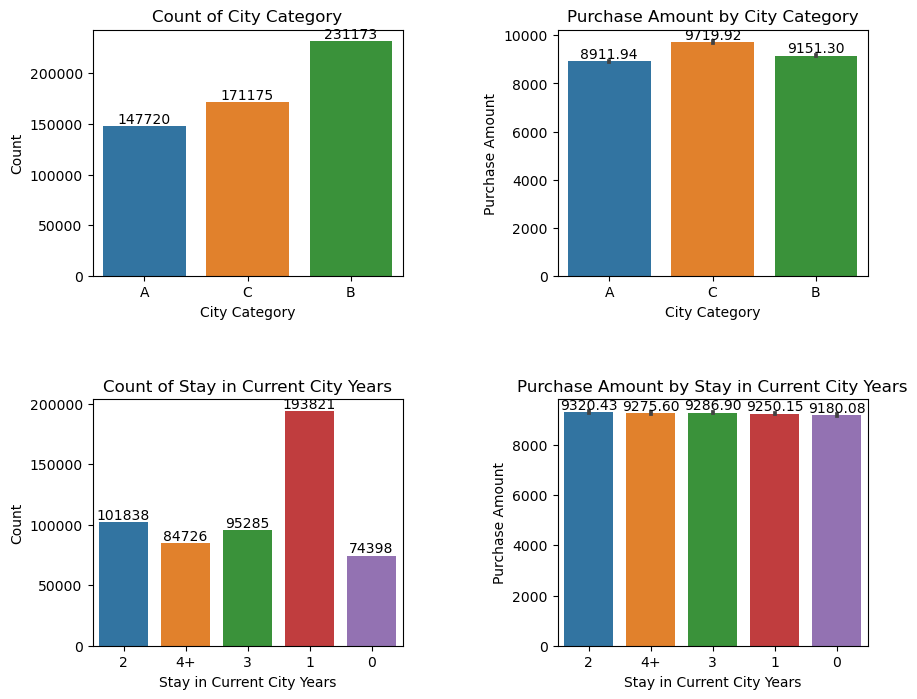

In [363]:
# Barchart for total purchase by various categpry of customers 
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Countplot for City Category
sns.countplot(x=df['City_Category'], ax=axis[0, 0])
axis[0, 0].set_title('Count of City Category')
axis[0, 0].set_xlabel('City Category')
axis[0, 0].set_ylabel('Count')
# Add count on top of each bar for City Category
for p in axis[0, 0].patches:
    axis[0, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Countplot for Stay in Current City Years
sns.countplot(x=df['Stay_In_Current_City_Years'], ax=axis[1, 0])
axis[1, 0].set_title('Count of Stay in Current City Years')
axis[1, 0].set_xlabel('Stay in Current City Years')
axis[1, 0].set_ylabel('Count')
# Add count on top of each bar for Stay in Current City Years
for p in axis[1, 0].patches:
    axis[1, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Barplot for City Category
sns.barplot(x=df['City_Category'], y=df['Purchase'], ax=axis[0,1])
axis[0, 1].set_title('Purchase Amount by City Category')
axis[0, 1].set_xlabel('City Category')
axis[0, 1].set_ylabel('Purchase Amount')
# Adding values on top of bars for City Category
for p in axis[0,1].patches:
    axis[0,1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

# Barplot for Stay in Current City Years
sns.barplot(x=df['Stay_In_Current_City_Years'], y=df['Purchase'], ax=axis[1, 1])
axis[1, 1].set_title('Purchase Amount by Stay in Current City Years')
axis[1, 1].set_xlabel('Stay in Current City Years')
axis[1, 1].set_ylabel('Purchase Amount')
# Adding values on top of bars for Stay in Current City Years
for p in axis[1, 1].patches:
    axis[1, 1].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust space between subplots

plt.show()


* City Category:

- Customers from City B has highest number of orders/purchases followed by C & A.
- City C has the highest purchase values compared to other 2.
- We can conclude that customer from City C have high value orders.

* Stay in current city:

- Customers living in the current city for just 1 year are making more number of purchases but the purchase value is similar to others.
- Irrespective of the number of years of stay in current city, all customers are buying almost the same purchase value.

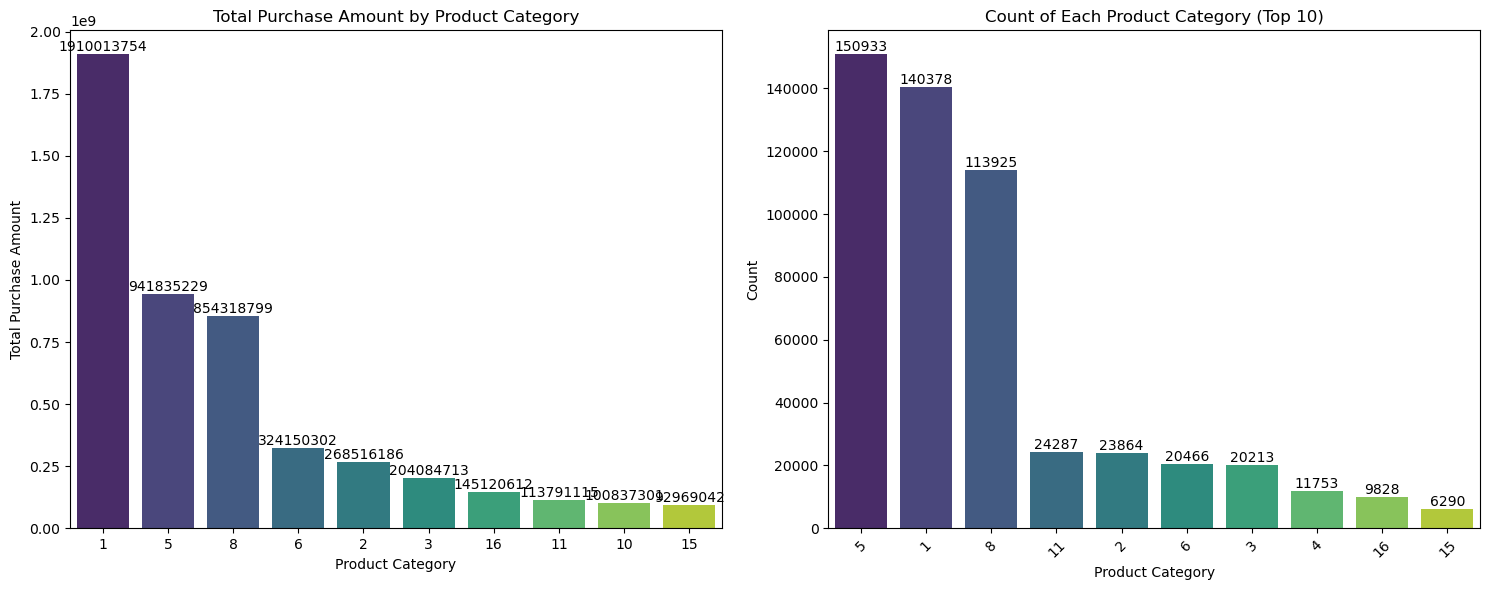

In [284]:
# First subplot: Total Purchase Amount by Product Category
purchase_sum_per_category = df.groupby('Product_Category')['Purchase'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 6))

# Subplot 1: Total Purchase Amount by Product Category
plt.subplot(1, 2, 1)
sns.barplot(x=purchase_sum_per_category.index, y=purchase_sum_per_category.values, order=purchase_sum_per_category.index, palette='viridis')
plt.title('Total Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')

# Adding values on top of bars for Subplot 1
for index, value in enumerate(purchase_sum_per_category.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Second subplot: Count of Each Product Category (Top 10)
plt.subplot(1, 2, 2)
top_categories = df['Product_Category'].value_counts().nlargest(10).index
sns.countplot(x=df['Product_Category'], order=top_categories, palette='viridis')
plt.title('Count of Each Product Category (Top 10)')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding values on top of bars for Subplot 2
for index, value in enumerate(df['Product_Category'].value_counts().nlargest(10).values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


- Product category 1 is the most sold product. Product category 5 & 8 are sold half of product category A.
- Product category 5 is having the highest purchase value compared to product cartegory 1 & 8.
- Product category 5 has high priced products and product category 1 has low priced products.

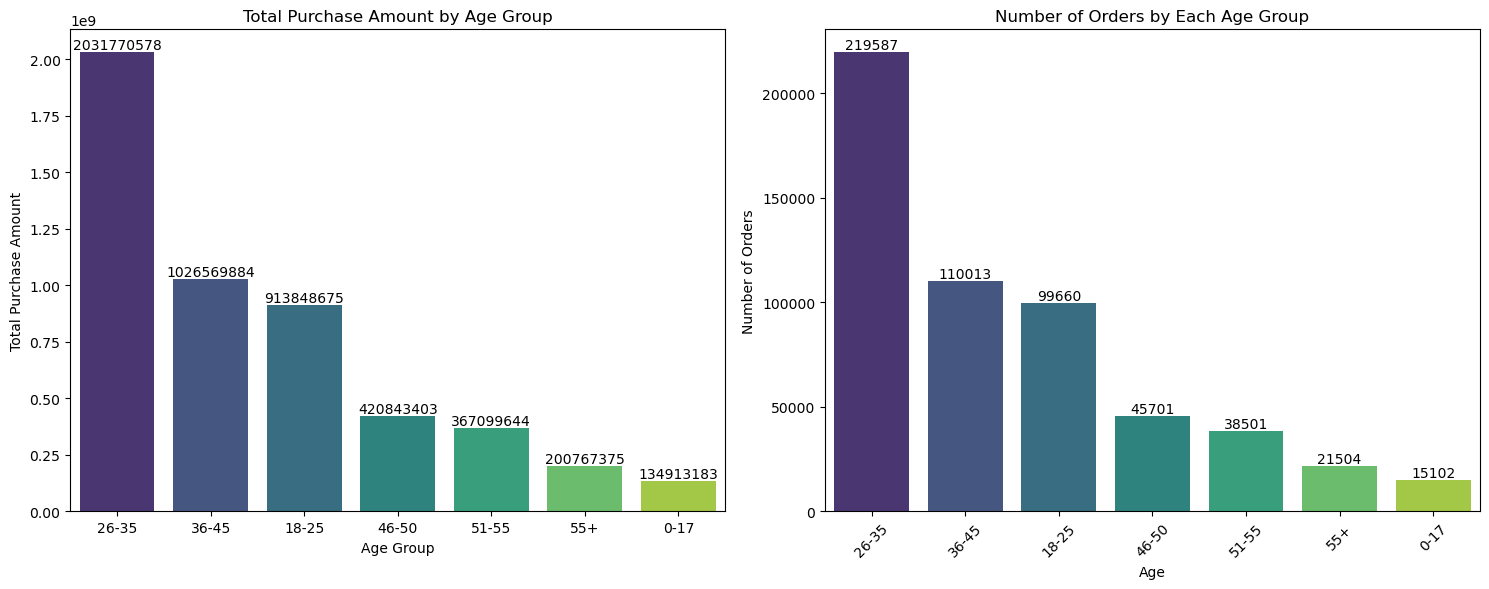

In [364]:
# First subplot: Total Purchase Amount by Age Group
purchase_sum_age = df.groupby('Age')['Purchase'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 6))

# Subplot 1: Total Purchase Amount by Age Group
plt.subplot(1, 2, 1)
sns.barplot(x=purchase_sum_age.index, y=purchase_sum_age.values, order=purchase_sum_age.index, palette='viridis')
plt.title('Total Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')

# Adding values on top of bars for Subplot 1
for index, value in enumerate(purchase_sum_age.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Second subplot: Number of Orders by Each Age Group
plt.subplot(1, 2, 2)
top_age = df['Age'].value_counts().index  # Extracting index from top_age
sns.countplot(x=df['Age'], order=top_age, palette='viridis')
plt.title('Number of Orders by Each Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding values on top of bars for Subplot 2
for index, value in enumerate(df['Age'].value_counts().nlargest(10).values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


- Customers of age group 26 - 35 have highest contribution to number of order/purchase and purchase value both. This is followed by age group 36 - 45 & 18 -25.
- Customers of age group 0-17 are making the least purchase from Walmart.

# Confidence Interval & CLT for Gender

In [21]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

- Sampling male and female customers from Population

In [365]:
# Sampling male customers from Population

male_spend_sam = [df[df.Gender == 'M'].sample(300).Purchase.mean() for i in range (2000)]

In [366]:
# Sampling female customers from Population

female_sam = [df[df.Gender=="F"].sample(300).Purchase.mean() for iter in range(2000)]

# CI using percentile method

In [368]:
Male_CI =np.percentile(male_spend_sam, (2.5, 97.5))
Female_CI = np.percentile(female_sam, (2.5, 97.5))

In [369]:
print(f'Male CI = {Male_CI}')
print(f'Female CI = {Female_CI}')

Male CI = [ 8844.23466667 10024.31675   ]
Female CI = [8206.58058333 9258.52083333]


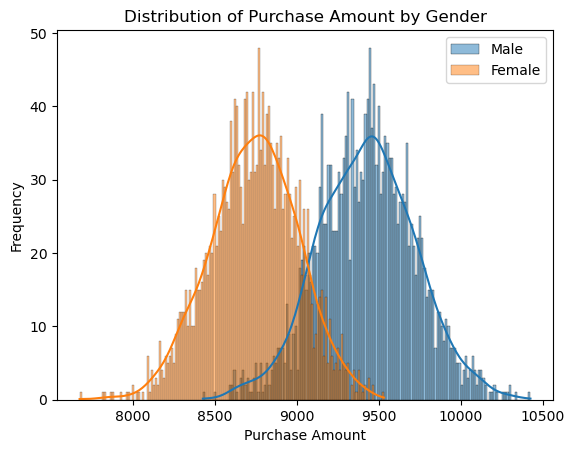

In [370]:
# Plot histogram for male_spend_sam
sns.histplot(data=male_spend_sam, bins=150, kde=True, label='Male')

# Plot histogram for female_sam
sns.histplot(data=female_sam, bins=150, kde=True, label='Female')

# Add legend
plt.legend()

plt.title('Distribution of Purchase Amount by Gender')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


In [371]:
print(f'Male spending mean of samples = {np.mean(male_spend_sam)}')
print(f'Female spending mean of samples = {np.mean(female_sam)}')

Male spending mean of samples = 9427.227353333334
Female spending mean of samples = 8739.779413333334


# CI using Z Score method

In [372]:
# with 95% confidence level
print('CI at 95% confidence level:')
print(f'Male CI = {(np.mean(male_spend_sam)-1.96*np.std(male_spend_sam), np.mean(male_spend_sam)+1.96*np.std(male_spend_sam))}')
print(f'Female CI = {(np.mean(female_sam)-1.96*np.std(female_sam), np.mean(female_sam)+1.96*np.std(female_sam))}')
print('\n')
# with 99% confidence level
print('CI at 95% confidence level:')
print(f'Male CI = {(np.mean(male_spend_sam)-(stats.norm.ppf(1-0.005))*np.std(male_spend_sam), np.mean(male_spend_sam)+(stats.norm.ppf(1-0.005))*np.std(male_spend_sam))}')
print(f'Female CI = {(np.mean(female_sam)-(stats.norm.ppf(1-0.005))*np.std(female_sam), np.mean(female_sam)+(stats.norm.ppf(1-0.005))*np.std(female_sam))}')

CI at 95% confidence level:
Male CI = (8847.385582678175, 10007.069123988493)
Female CI = (8214.88006788649, 9264.678758780177)


CI at 95% confidence level:
Male CI = (8665.200096050048, 10189.25461061662)
Female CI = (8049.957415672305, 9429.601410994363)


# Inference
- Here we can see that with both 95% and 99% confidence level, lower value of confidence interval of male customers is overlapping with the upper bound CI of female customers. Considering the mean purchase value, we can concllude that male customers purchase more than female customers.

# CI for Marital Status on Purchase

In [374]:
df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [104]:
unmarried_spend = [df[df.Marital_Status == 0].sample(300).Purchase.mean() for i in range (2000)]

In [106]:
married_spend = [df[df.Marital_Status == 1].sample(300).Purchase.mean() for i in range (2000)]

In [375]:
print(f'Mean of unmarried purchase sample = {np.mean(unmarried_spend)}')
print(f'Mean of married purchase sample = {np.mean(married_spend)}')

Mean of unmarried purchase sample = 9273.560023333333
Mean of married purchase sample = 9267.535253333333


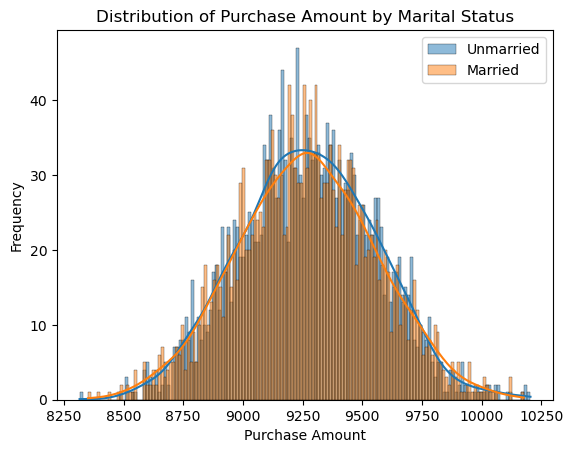

In [334]:
# Plot histogram for male_spend_sam
sns.histplot(data=unmarried_spend, bins=150, kde=True, label='Unmarried')

# Plot histogram for female_sam
sns.histplot(data=married_spend, bins=150, kde=True, label='Married')

# Add legend
plt.legend()

plt.title('Distribution of Purchase Amount by Marital Status')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


In [377]:
# with 95% confidence level
print('CI at 95% confidence level:')
print(f'Unmarried CI = {(np.mean(unmarried_spend)-1.96*np.std(unmarried_spend), np.mean(unmarried_spend)+1.96*np.std(unmarried_spend))}')
# with 95% confidence level
print(f'Married CI = {(np.mean(married_spend)-1.96*np.std(married_spend), np.mean(married_spend)+1.96*np.std(married_spend))}')

print('\n')

# with 99% confidence level
print('CI at 95% confidence level:')
print(f'Unmarried CI = {(np.mean(unmarried_spend)-2.57*np.std(unmarried_spend), np.mean(unmarried_spend)+2.57*np.std(unmarried_spend))}')
# with 99% confidence level
print(f'Married CI = {(np.mean(married_spend)-2.57*np.std(married_spend), np.mean(married_spend)+2.57*np.std(married_spend))}')

CI at 95% confidence level:
Unmarried CI = (8714.836522965034, 9832.283523701633)
Married CI = (8696.166917415223, 9838.903589251444)


CI at 95% confidence level:
Unmarried CI = (8540.948086625918, 10006.171960040749)
Married CI = (8518.343098583566, 10016.727408083101)


# Inference
- We can see that the confidence interval for Married and Unmarried customers are overlapping completely with both 95% & 99% confidence level. Hence we can conclude that there is no difference in married and unmarried customers.

# CI for City Category on purchase

In [115]:
df.groupby('City_Category')['Purchase'].mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [116]:
cityA = [df[df.City_Category == 'A'].sample(300).Purchase.mean() for i in range (1000)]

In [117]:
cityB = [df[df.City_Category == 'B'].sample(300).Purchase.mean() for i in range (1000)]

In [118]:
cityC = [df[df.City_Category == 'C'].sample(300).Purchase.mean() for i in range (1000)]

In [381]:
print(f'Mean of City A purchase sample = {np.mean(cityA)}')
print(f'Mean of City B purchase sample = {np.mean(cityB)}')
print(f'Mean of City C purchase sample = {np.mean(cityC)}')

Mean of City A purchase sample = 8916.82427
Mean of City B purchase sample = 9146.172013333333
Mean of City C purchase sample = 9722.905353333335


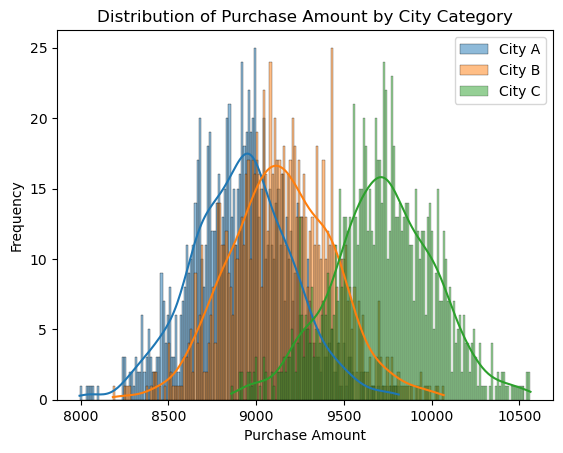

In [379]:
# Plot histogram for male_spend_sam
sns.histplot(data=cityA, bins=150, kde=True, label='City A')

# Plot histogram for female_sam
sns.histplot(data=cityB, bins=150, kde=True, label='City B')

sns.histplot(data=cityC, bins=150, kde=True, label='City C')

# Add legend
plt.legend()

plt.title('Distribution of Purchase Amount by City Category')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


In [378]:
# with 95% confidence level
print('CI at 95% confidence level:')
print(f'city A = {(np.mean(cityA)-1.96*np.std(cityA), np.mean(cityA)+1.96*np.std(cityA))}')
print(f'city B = {(np.mean(cityB)-1.96*np.std(cityB), np.mean(cityB)+1.96*np.std(cityB))}')
print(f'city C = {(np.mean(cityC)-1.96*np.std(cityC), np.mean(cityC)+1.96*np.std(cityC))}')

print('\n')

# with 99% confidence level
print('CI at 95% confidence level:')
print(f'city A = {(np.mean(cityA)-2.57*np.std(cityA), np.mean(cityA)+2.57*np.std(cityA))}')
print(f'city B = {(np.mean(cityB)-2.57*np.std(cityB), np.mean(cityB)+2.57*np.std(cityB))}')
print(f'city C = {(np.mean(cityC)-2.57*np.std(cityC), np.mean(cityC)+2.57*np.std(cityC))}')

CI at 95% confidence level:
city A = (8351.356981799534, 9482.291558200464)
city B = (8562.672315203637, 9729.671711463028)
city C = (9137.295745500325, 10308.514961166346)


CI at 95% confidence level:
city A = (8175.369713533064, 9658.278826466934)
city B = (8381.07291935715, 9911.271107309516)
city C = (8955.039694082909, 10490.771012583762)


# Inference:
 
 - We can see that the mean of City Category C is higher than that of City A & B. Confidence interval of city A & B are almost overlapping while city c is distinctly higher than them at both 95% & 99% confidence level.
- We can conclude that customers from City C have higher purchase value.
- From the above observation, it is recommended to focus on customers of City Category C.

# CI for age group on purchase

In [125]:
df.groupby('Age')['Purchase'].mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [130]:
age_0_17 = [df[df.Age == '0-17'].sample(300).Purchase.mean() for i in range (1000)]

In [131]:
age_18_25 = [df[df.Age == '18-25'].sample(300).Purchase.mean() for i in range (1000)]

In [132]:
age_26_35 = [df[df.Age == '26-35'].sample(300).Purchase.mean() for i in range (1000)]

In [133]:
age_36_45 = [df[df.Age == '36-45'].sample(300).Purchase.mean() for i in range (1000)]

In [134]:
age_46_50 = [df[df.Age == '46-50'].sample(300).Purchase.mean() for i in range (1000)]

In [135]:
age_51_55 = [df[df.Age == '51-55'].sample(300).Purchase.mean() for i in range (1000)]

In [136]:
age_55 = [df[df.Age == '55+'].sample(300).Purchase.mean() for i in range (1000)]

In [137]:
print(f'Mean of age 0 to 17 purchase sample = {np.mean(age_0_17)}')
print(f'Mean of age 18 to 25 purchase sample = {np.mean(age_18_25)}')
print(f'Mean of age 26 to 35 purchase sample = {np.mean(age_26_35)}')
print(f'Mean of age 36 to 45 purchase sample = {np.mean(age_36_45)}')
print(f'Mean of age 45 to 50 purchase sample = {np.mean(age_46_50)}')
print(f'Mean of age 51 to 55 purchase sample = {np.mean(age_51_55)}')
print(f'Mean of age 55+ purchase sample = {np.mean(age_55)}')

Mean of age 0 to 17 purchase sample = 8932.291640000001
Mean of age 18 to 25 purchase sample = 9155.87391
Mean of age 26 to 35 purchase sample = 9254.152936666667
Mean of age 36 to 45 purchase sample = 9329.365483333333
Mean of age 45 to 50 purchase sample = 9212.115886666666
Mean of age 51 to 55 purchase sample = 9560.303453333334
Mean of age 55+ purchase sample = 9334.66413


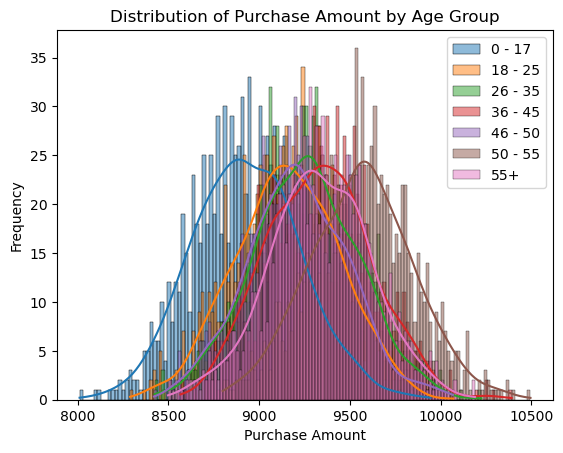

In [341]:
sns.histplot(data=age_0_17, bins=100, kde=True, label='0 - 17')
sns.histplot(data=age_18_25, bins=100, kde=True, label='18 - 25')
sns.histplot(data=age_26_35, bins=100, kde=True, label='26 - 35')
sns.histplot(data=age_36_45, bins=100, kde=True, label='36 - 45')
sns.histplot(data=age_46_50, bins=100, kde=True, label='46 - 50')
sns.histplot(data=age_51_55, bins=100, kde=True, label='50 - 55')
sns.histplot(data=age_55, bins=100, kde=True, label='55+')

plt.legend()

plt.title('Distribution of Purchase Amount by Age Group')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [380]:
# with 95% confidence level
print('CI at 95% confidence level:')
print(f'Age 0 to 17 = {(np.mean(age_0_17)-1.96*np.std(age_0_17), np.mean(age_0_17)+1.96*np.std(age_0_17))}')
print(f'Age 18 to 25 = {(np.mean(age_18_25)-1.96*np.std(age_18_25), np.mean(age_18_25)+1.96*np.std(age_18_25))}')
print(f'Age 26 to 35 = {(np.mean(age_26_35)-1.96*np.std(age_26_35), np.mean(age_26_35)+1.96*np.std(age_26_35))}')
print(f'Age 36 to 45 = {(np.mean(age_36_45)-1.96*np.std(age_36_45), np.mean(age_36_45)+1.96*np.std(age_36_45))}')
print(f'Age 46 to 50 = {(np.mean(age_46_50)-1.96*np.std(age_46_50), np.mean(age_46_50)+1.96*np.std(age_46_50))}')
print(f'Age 51 to 55 = {(np.mean(age_51_55)-1.96*np.std(age_51_55), np.mean(age_51_55)+1.96*np.std(age_51_55))}')
print(f'Age 55+ = {(np.mean(age_55)-1.96*np.std(age_55), np.mean(age_55)+1.96*np.std(age_55))}')

print('\n')

# with 99% confidence level
print('CI at 95% confidence level:')
print(f'Age 0 to 17 = {(np.mean(age_0_17)-2.57*np.std(age_0_17), np.mean(age_0_17)+2.57*np.std(age_0_17))}')
print(f'Age 18 to 25 = {(np.mean(age_18_25)-2.57*np.std(age_18_25), np.mean(age_18_25)+2.57*np.std(age_18_25))}')
print(f'Age 26 to 35 = {(np.mean(age_26_35)-2.57*np.std(age_26_35), np.mean(age_26_35)+2.57*np.std(age_26_35))}')
print(f'Age 36 to 45 = {(np.mean(age_36_45)-2.57*np.std(age_36_45), np.mean(age_36_45)+2.57*np.std(age_36_45))}')
print(f'Age 46 to 50 = {(np.mean(age_46_50)-2.57*np.std(age_46_50), np.mean(age_46_50)+2.57*np.std(age_46_50))}')
print(f'Age 51 to 55 = {(np.mean(age_51_55)-2.57*np.std(age_51_55), np.mean(age_51_55)+2.57*np.std(age_51_55))}')
print(f'Age 55+ = {(np.mean(age_55)-2.57*np.std(age_55), np.mean(age_55)+2.57*np.std(age_55))}')

CI at 95% confidence level:
Age 0 to 17 = (8352.465594155228, 9512.117685844774)
Age 18 to 25 = (8592.383240847455, 9719.364579152545)
Age 26 to 35 = (8685.472383252283, 9822.833490081051)
Age 36 to 45 = (8764.316562480388, 9894.414404186278)
Age 46 to 50 = (8666.20557256077, 9758.026200772563)
Age 51 to 55 = (8998.987143587774, 10121.619763078894)
Age 55+ = (8787.334404973275, 9881.993855026723)


CI at 95% confidence level:
Age 0 to 17 = (8172.009528866804, 9692.573751133197)
Age 18 to 25 = (8417.011144835695, 9894.736675164306)
Age 26 to 35 = (8508.48506815903, 9999.820805174304)
Age 36 to 45 = (8588.459500378196, 10070.27146628847)
Age 46 to 50 = (8496.304913578831, 9927.926859754501)
Age 51 to 55 = (8824.291761473085, 10296.315145193583)
Age 55+ = (8616.991990551693, 10052.336269448306)


# Inference:

- Customer of age group 51 - 55 have the highest mean purchase value of 9560.30.
- Customers of age group 0 - 17 have the least mean purchase value of 8932.29.
- Confidence interval of all the age group 18 to 50 & 55+ are almost overlapping.
- Confidence interval of age group 55+ is slightly higher than the others.
- Hence we can focus on this age group.

# CI for Years staying in current city on purchase

In [383]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean()

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

In [388]:
y0 = [df[df.Stay_In_Current_City_Years == '0'].sample(300).Purchase.mean() for i in range (1000)]
y1 = [df[df.Stay_In_Current_City_Years == '1'].sample(300).Purchase.mean() for i in range (1000)]
y2 = [df[df.Stay_In_Current_City_Years == '2'].sample(300).Purchase.mean() for i in range (1000)]
y3 = [df[df.Stay_In_Current_City_Years == '3'].sample(300).Purchase.mean() for i in range (1000)]
y4 = [df[df.Stay_In_Current_City_Years == '4+'].sample(300).Purchase.mean() for i in range (1000)]

In [389]:
print(f'Mean of year 0 = {np.mean(y0)}')
print(f'Mean of year 1 = {np.mean(y1)}')
print(f'Mean of year 2 = {np.mean(y2)}')
print(f'Mean of year 3 = {np.mean(y3)}')
print(f'Mean of year 4 = {np.mean(y4)}')

Mean of year 0 = 9186.416016666666
Mean of year 1 = 9263.19256
Mean of year 2 = 9315.990013333334
Mean of year 3 = 9278.000116666668
Mean of year 4 = 9283.585353333334


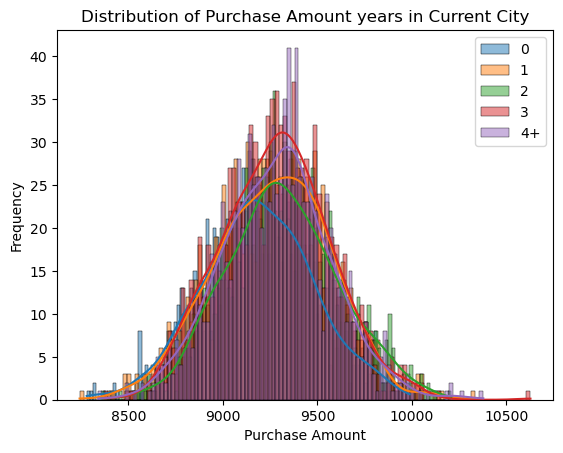

In [391]:
sns.histplot(data=y0, bins=100, kde=True, label='0')
sns.histplot(data=y1, bins=100, kde=True, label='1')
sns.histplot(data=y2, bins=100, kde=True, label='2')
sns.histplot(data=y3, bins=100, kde=True, label='3')
sns.histplot(data=y4, bins=100, kde=True, label='4+')


plt.legend()

plt.title('Distribution of Purchase Amount years in Current City')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# with 95% confidence level
print('CI at 95% confidence level:')
print(f'Year 0 = {(np.mean(y0)-1.96*np.std(y0), np.mean(y0)+1.96*np.std(y0))}')
print(f'Year 1 = {(np.mean(y1)-1.96*np.std(y1), np.mean(y1)+1.96*np.std(y1))}')
print(f'Year 2 = {(np.mean(y2)-1.96*np.std(y2), np.mean(y2)+1.96*np.std(y2))}')
print(f'Year 3 = {(np.mean(y3)-1.96*np.std(y3), np.mean(y3)+1.96*np.std(y3))}')
print(f'Year 4+ = {(np.mean(y4)-1.96*np.std(y4), np.mean(y4)+1.96*np.std(y4))}')

print('\n')

# with 99% confidence level
print('CI at 95% confidence level:')
print(f'Year 0 = {(np.mean(y0)-2.57*np.std(y0), np.mean(y0)+2.57*np.std(y0))}')
print(f'Year 1 = {(np.mean(y1)-2.57*np.std(y1), np.mean(y1)+2.57*np.std(y1))}')
print(f'Year 2 = {(np.mean(y2)-2.57*np.std(y2), np.mean(y2)+2.57*np.std(y2))}')
print(f'Year 3 = {(np.mean(y3)-2.57*np.std(y3), np.mean(y3)+2.57*np.std(y3))}')
print(f'Year 4+ = {(np.mean(y4)-2.57*np.std(y4), np.mean(y4)+2.57*np.std(y4))}')

# Inference:

- Irrespective of the number of years staying in current city, mean of the purchase value is almost the same. Confidence interval completely overlaps with each other.
- Hence there is no difference in purchase value based on years in current city.

# Insights:

- There are 5891 unique customers who bought from Walmart.

GENDER
- 75% of customers are male.
- The purchase value per order is higher for female customers compared to male customers.
- Based on 95% and 99% confidence level & CLT, male customers purchase more than female customers.

MARITAL STATUS:
- 59% customers are unmarried while 41% are married.
- Purchase value per order is high for married customers.
- There is no difference in the married and unmarried purchase behaviour (based on CI and CLT).

Age Group:
- There are 7 age groups. Majority of customers are of age group 26 - 35.
- Customers of age group 51 - 55 have higher purchase value per order.
- Confidence interval of age group 55+ is slightly higher than the others. This is followed by age group 36 - 45 & 55+.

City Category:
- Out of the 3 category of city, majority of customers (42%) are from City B category.
- Customers from City C have higher purchase value

Current city year:
- 86.5% of customers are staying in the current city for at least 1 year
- Customers staying in current city for 2 years have slightly higher purchase value per order. Otherwise, there is no difference in purchase value per order based on years in current city.

Product category:
- There are 20 product categories and 3631 distinct products.
- Product category 5 is the most purchased in terms of units.
- Product category 5 is having the highest purchase value compared to product category 1 & 8.
- Product category 5 has high priced products.

# Recommendations:

- Focus on onboarding more Female customers as their purchase value per order is higher.
- Retain male customers as they spend more than female customers.
- Concentrate on age group of 51 - 55 & 55+ as they have high purchase value per order.
- Bring in more customers from City Category C.
- Offer promotions for product category 5 as they have very high sale and price as well.